Ejercicio 6

Un dataset contiene:

● Nivel_glucosa: medida de glucosa en sangre

● Diabetico: 1 si la persona tiene diabetes, 0 si no

Tareas:
1. Entrenar un modelo de regresión logística para predecir Diabetico en función del Nivel_glucosa.
2. Graficar la curva logística.
3. Evaluar la precisión del modelo con un conjunto de prueba.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ULP-UGD/Programacion_Avanzada/refs/heads/main/TP12/nivel_glucosa_diabetes.csv')
X = data[['Nivel_glucosa']]
y = data['Diabetico']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

X_plot = np.linspace(60, 200, 300).reshape(-1, 1)
y_prob = modelo.predict_proba(X_plot)[:, 1]

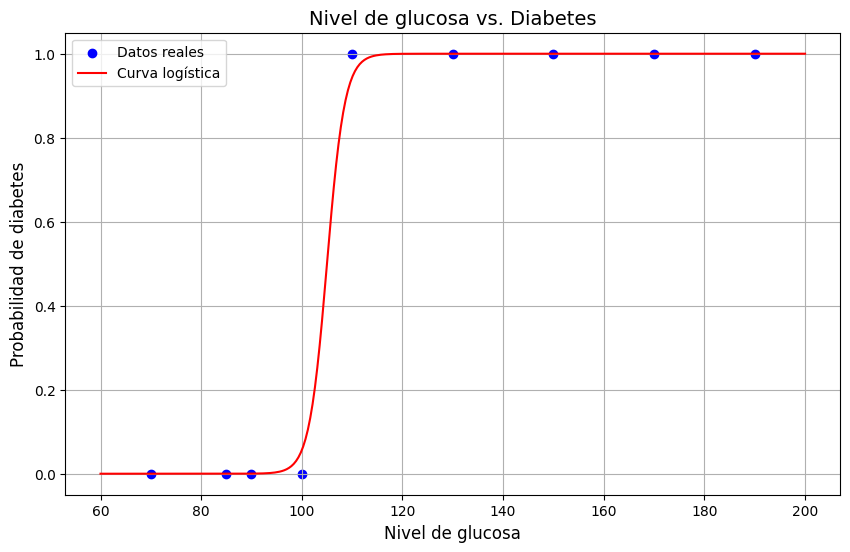

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_plot, y_prob, 'r-', label='Curva logística')
plt.title('Nivel de glucosa vs. Diabetes', fontsize=14)
plt.xlabel('Nivel de glucosa', fontsize=12)
plt.ylabel('Probabilidad de diabetes', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
accuracy = modelo.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2%}")

y_pred = modelo.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 100.00%

Matriz de confusión:
[[1 0]
 [0 2]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

